In [1]:
import pandas as pd
df=pd.read_csv('WHI_Inflation.csv')
df.columns

In [14]:
dup_col_names = df.columns[df.columns.duplicated()]
print(dup_col_names)


Index([], dtype='object')


In [15]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation          32
Energy Consumer Price Inflation           142
Food Consumer Price Inflation             102
Official Core Consumer Price Inflation    498
Producer Price Inflation                  463
GDP deflator Index growth rate             21
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1232 non-null   object 
 1   Year                              1232 non-null   int64  
 2   Continent/Region                  1232 non-null   object 
 3   Score                             1232 non-null   float64
 4   GDP per Capita                    1232 non-null   float64
 5   Social support                    1232 non-null   float64
 6   Healthy life expectancy at birth  1232 non-null   float64
 7   Freedom to make life choices      1232 non-null   float64
 8   Generosity                        1232 non-null   float64
 9   Perceptions of corruption         1231 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 96.4+ KB


In [10]:
df.head(2)

,Country,Year,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,South Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
1,Afghanistan,2016,South Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112


In [21]:
df.shape

(1155, 16)

In [22]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation            65
Food Consumer Price Inflation              25
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1155 non-null   object 
 1   Year                                    1155 non-null   int64  
 2   Headline Consumer Price Inflation       1155 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  716 non-null    float64
 6   Producer Price Inflation                751 non-null    float64
 7   GDP deflator Index growth rate          1154 non-null   float64
 8   Continent/Region                        1155 non-null   object 
 9   Score                                   1155 non-null   float64
 10  GDP per Capita                          1155 non-null   float64
 

In [25]:

df = df.sort_values(['Country', 'Year'])

df['Energy Consumer Price Inflation'] = (
    df.groupby('Country')['Energy Consumer Price Inflation']
      .transform(lambda x: x.interpolate(method='linear'))
)


In [26]:
df.isna().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation            45
Food Consumer Price Inflation              25
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [29]:
df['Energy Consumer Price Inflation'] = (
    df.groupby('Country')['Energy Consumer Price Inflation']
      .transform(lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill'))
)
# Fill remaining NaNs using country-wise mean
df['Energy Consumer Price Inflation'] = (
    df.groupby('Country')['Energy Consumer Price Inflation']
      .transform(lambda x: x.fillna(x.mean())))

C:\Users\mary p seby\AppData\Local\Temp\ipykernel_14508\1633481750.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill'))


In [30]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation            42
Food Consumer Price Inflation              25
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [31]:
df['Energy Consumer Price Inflation'] = (
    df.groupby('Country')['Energy Consumer Price Inflation']
      .transform(lambda x: x.fillna(x.mean())))

In [32]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation            42
Food Consumer Price Inflation              25
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [35]:
# Fill missing values with overall mean
df['Energy Consumer Price Inflation'].fillna(df['Energy Consumer Price Inflation'].mean(),inplace=True)


C:\Users\mary p seby\AppData\Local\Temp\ipykernel_14508\462947818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy Consumer Price Inflation'].fillna(df['Energy Consumer Price Inflation'].mean(),inplace=True)


In [38]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation              25
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [39]:
df = df.sort_values(['Country', 'Year'])


In [40]:
df['Food Consumer Price Inflation'] = df.groupby('Country')['Food Consumer Price Inflation'].transform(
    lambda x: x.interpolate(method='linear')
)


In [41]:
df['Food Consumer Price Inflation'] = df.groupby('Country')['Food Consumer Price Inflation'].transform(
    lambda x: x.fillna(x.mean())
)


In [42]:
global_mean = df['Food Consumer Price Inflation'].mean()
df['Food Consumer Price Inflation'] = df['Food Consumer Price Inflation'].fillna(global_mean)


In [43]:
print("Remaining NaNs:", df['Food Consumer Price Inflation'].isna().sum())


Remaining NaNs: 0


mean_value: 8.172002213511599
std_value: 26.263588825092068


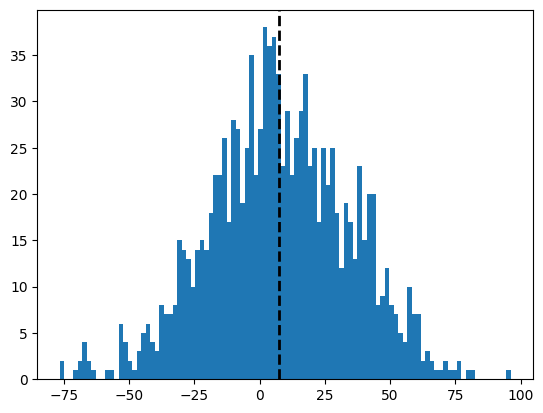

In [46]:
import numpy as np
import matplotlib.pyplot as plt
mean_value=df['Food Consumer Price Inflation'].mean()
print("mean_value:",mean_value)
std_value=df["Food Consumer Price Inflation"].std()
print("std_value:",std_value)
size=df["Food Consumer Price Inflation"].size
size
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

mean_value: 6.487245108249834
std_value: 16.27251313821894


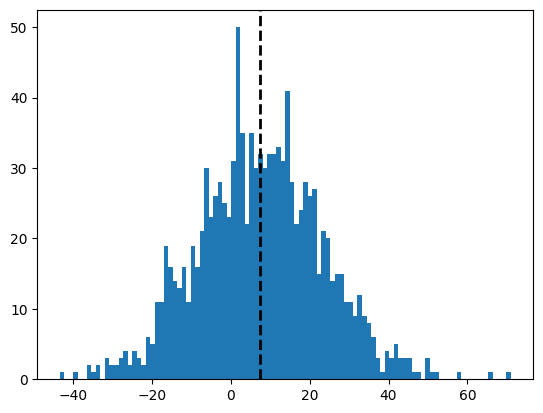

In [48]:
import numpy as np
import matplotlib.pyplot as plt
mean_value=df['Energy Consumer Price Inflation'].mean()
print("mean_value:",mean_value)
std_value=df['Energy Consumer Price Inflation'].std()
print("std_value:",std_value)
size=df['Energy Consumer Price Inflation'].size
size
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

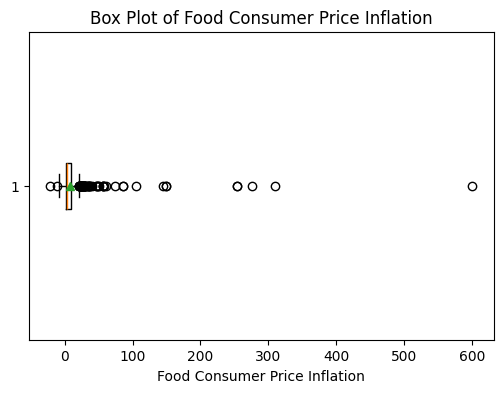

In [49]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    df['Food Consumer Price Inflation'].dropna(),
    vert=False,
    showmeans=True
)

plt.xlabel("Food Consumer Price Inflation")
plt.title("Box Plot of Food Consumer Price Inflation")
plt.show()


In [50]:
Q1 = df['Food Consumer Price Inflation'].quantile(0.25)
Q3 = df['Food Consumer Price Inflation'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df['Food Consumer Price Inflation'] >= lower_bound) &
    (df['Food Consumer Price Inflation'] <= upper_bound)
]


mean_value: 6.487245108249834
std_value: 16.27251313821894


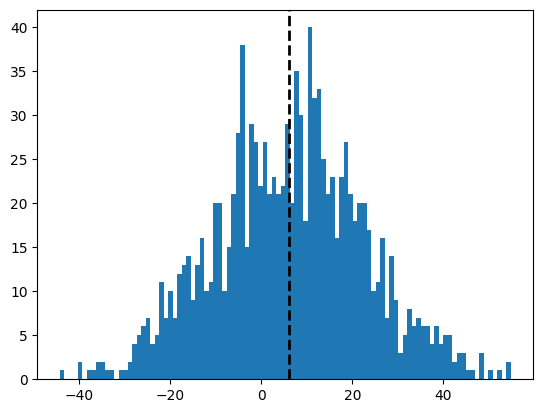

In [51]:
mean_value=df['Energy Consumer Price Inflation'].mean()
print("mean_value:",mean_value)
std_value=df['Energy Consumer Price Inflation'].std()
print("std_value:",std_value)
size=df['Energy Consumer Price Inflation'].size
size
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

In [52]:
from scipy.stats import zscore

df_clean = df[
    abs(zscore(df['Food Consumer Price Inflation'].dropna())) < 3
]


mean_value: 6.487245108249834
std_value: 16.27251313821894


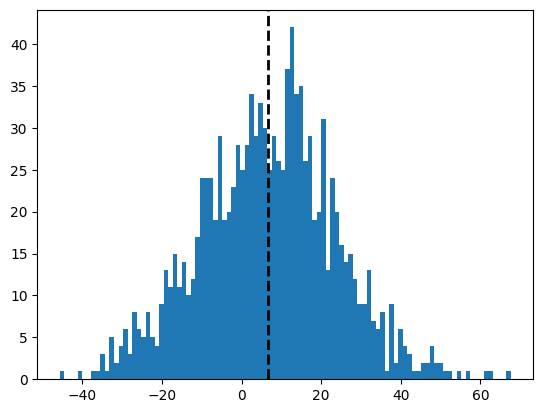

In [53]:
mean_value=df['Energy Consumer Price Inflation'].mean()
print("mean_value:",mean_value)
std_value=df['Energy Consumer Price Inflation'].std()
print("std_value:",std_value)
size=df['Energy Consumer Price Inflation'].size
size
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

In [58]:
lower = df['Food Consumer Price Inflation'].quantile(0.01)
upper = df['Food Consumer Price Inflation'].quantile(0.99)

df['Food Consumer Price Inflation'] = df['Food Consumer Price Inflation'].clip(
    lower, upper
)


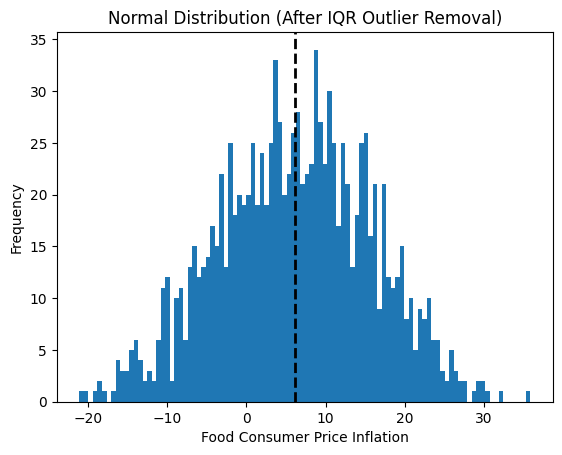

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Cleaned data
data = df['Food Consumer Price Inflation']

# Mean, Std, Size
mean_value = data.mean()
std_value = data.std()
size = data.size

# Generate normal distribution
values = np.random.normal(mean_value, std_value, size)

# Plot histogram
plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('Food Consumer Price Inflation')
plt.ylabel('Frequency')
plt.title('Normal Distribution (After IQR Outlier Removal)')
plt.show()


In [61]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1155 non-null   object 
 1   Year                                    1155 non-null   int64  
 2   Headline Consumer Price Inflation       1155 non-null   float64
 3   Energy Consumer Price Inflation         1155 non-null   float64
 4   Food Consumer Price Inflation           1155 non-null   float64
 5   Official Core Consumer Price Inflation  716 non-null    float64
 6   Producer Price Inflation                751 non-null    float64
 7   GDP deflator Index growth rate          1154 non-null   float64
 8   Continent/Region                        1155 non-null   object 
 9   Score                                   1155 non-null   float64
 10  GDP per Capita                          1155 non-null   float64
 

In [63]:
df['Perceptions of corruption'] = (
    df.groupby('Country')['Perceptions of corruption']
      .transform(lambda x: x.fillna(x.median()))
)


In [65]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   0
dtype: int64

mean_value: 0.13575201097056278
std_value: 0.11680146202276359


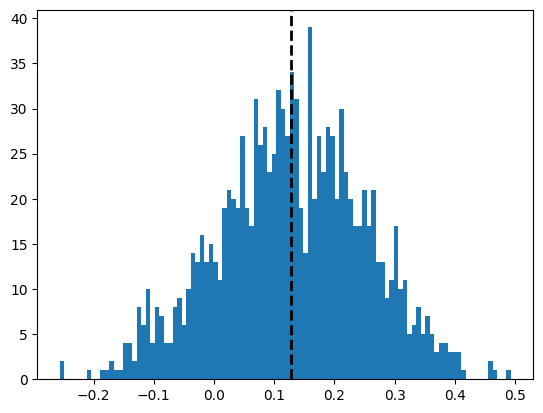

In [66]:
mean_value=df['Perceptions of corruption'].mean()
print("mean_value:",mean_value)
std_value=df['Perceptions of corruption'].std()
print("std_value:",std_value)
size=df['Perceptions of corruption'].size
size
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

In [12]:
df.to_csv("WHicleaned_data.csv", index=False)


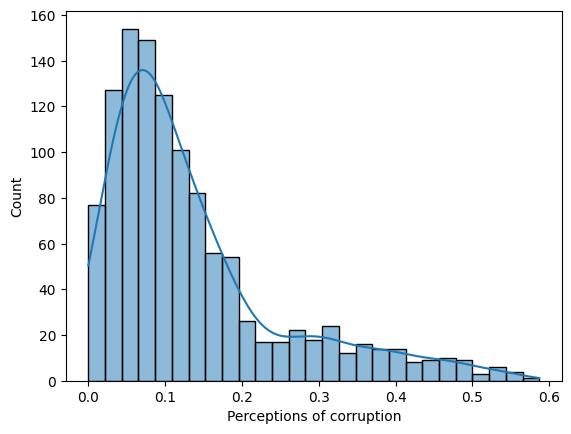

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Perceptions of corruption'], kde=True)
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("WHicleaned_data.csv")
# Log transform (best for right skew)
df['Perceptions_log'] = np.log1p(df['Perceptions of corruption'])


In [4]:
mean_value = df['Perceptions_log'].mean()
print("mean_value:", mean_value)

std_value = df['Perceptions_log'].std()
print("std_value:", std_value)

size = df['Perceptions_log'].size


mean_value: 0.1224491517659238
std_value: 0.09645221033816283


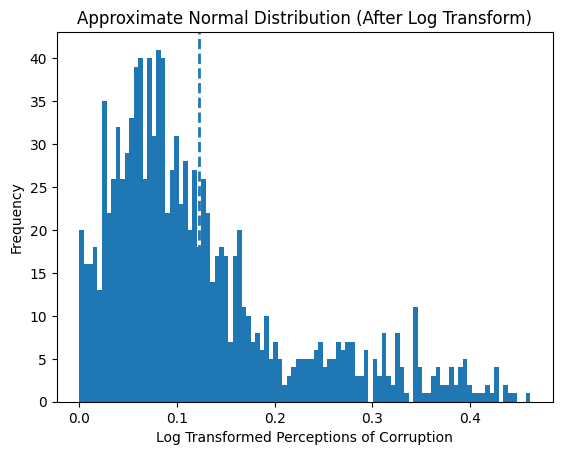

In [5]:
plt.hist(df['Perceptions_log'], bins=100)
plt.axvline(mean_value, linestyle='dashed', linewidth=2)
plt.xlabel('Log Transformed Perceptions of Corruption')
plt.ylabel('Frequency')
plt.title('Approximate Normal Distribution (After Log Transform)')
plt.show()


mean_value: 0.1224491517659238
std_value: 0.09645221033816283


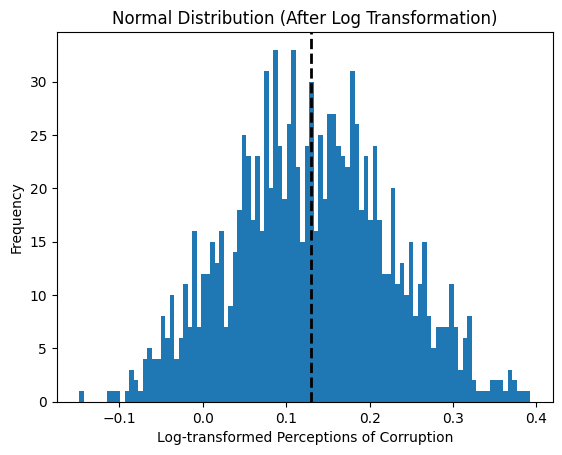

In [8]:
mean_value = df['Perceptions_log'].mean()
print("mean_value:", mean_value)

std_value = df['Perceptions_log'].std()
print("std_value:", std_value)

size = df['Perceptions_log'].size
size
values = np.random.normal(mean_value, std_value, size)
values=np.random.normal(mean_value,std_value,size)
plt.hist(values,100)
plt.axvline(values.mean(),color='k',linestyle='dashed',linewidth=2)
plt.show()

In [9]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              1
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   0
Perceptions_log                             0
dtype: int64

In [10]:
df.head(2)

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Perceptions_log
0,Afghanistan,2015,-0.66,-4.25,-0.84,0.219999,NaN,2.665090,South Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,0.092752
1,Afghanistan,2016,4.38,2.07,5.67,5.192760,NaN,-2.409509,South Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,0.068705


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1155 non-null   object 
 1   Year                                    1155 non-null   int64  
 2   Headline Consumer Price Inflation       1155 non-null   float64
 3   Energy Consumer Price Inflation         1155 non-null   float64
 4   Food Consumer Price Inflation           1155 non-null   float64
 5   Official Core Consumer Price Inflation  716 non-null    float64
 6   Producer Price Inflation                751 non-null    float64
 7   GDP deflator Index growth rate          1154 non-null   float64
 8   Continent/Region                        1155 non-null   object 
 9   Score                                   1155 non-null   float64
 10  GDP per Capita                          1155 non-null   floa

In [14]:
# sort first (VERY important)
df = df.sort_values(['Country', 'Year'])

df['GDP deflator Index growth rate'] = (
    df.groupby('Country')['GDP deflator Index growth rate']
      .transform(lambda x: x.interpolate(method='linear'))
)


In [15]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              0
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   0
Perceptions_log                             0
dtype: int64

mean_value: 6.628764366898295
std_value: 30.804600732060678


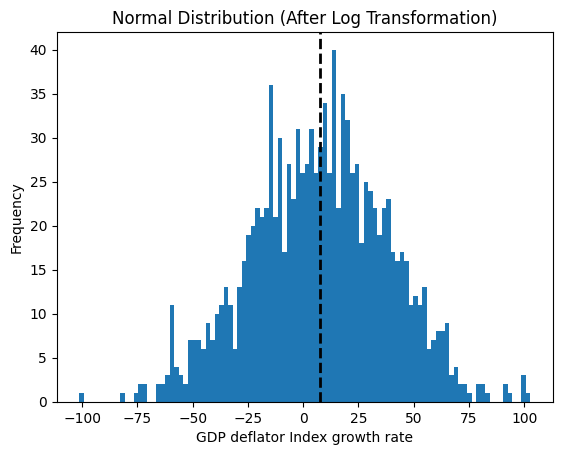

In [16]:
mean_value = df['GDP deflator Index growth rate'].mean()
print("mean_value:", mean_value)

std_value = df['GDP deflator Index growth rate'].std()

print("std_value:", std_value)

size = df['GDP deflator Index growth rate'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('GDP deflator Index growth rate')
plt.ylabel('Frequency')
plt.title('Normal Distribution (After Log Transformation)')
plt.show()


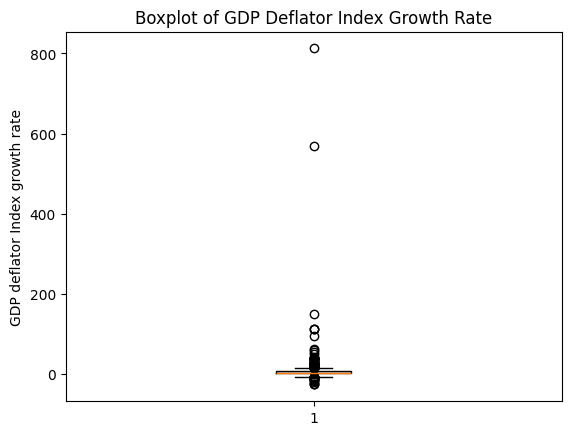

In [17]:
import matplotlib.pyplot as plt

plt.boxplot(df['GDP deflator Index growth rate'].dropna(), vert=True)
plt.ylabel('GDP deflator Index growth rate')
plt.title('Boxplot of GDP Deflator Index Growth Rate')
plt.show()


In [40]:
# Select column
col = 'GDP deflator Index growth rate'

# Calculate quartiles
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[
    (df[col] >= lower_bound) &
    (df[col] <= upper_bound)
]
df_clean 

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Perceptions_log
0,Afghanistan,2015,-0.660000,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,0.092752
1,Afghanistan,2016,4.380000,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,0.068705
2,Afghanistan,2017,4.976000,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,0.059361
3,Afghanistan,2018,0.630000,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,0.035367
4,Afghanistan,2019,2.302000,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,0.024693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Zimbabwe,2019,255.292007,90.808071,63.268273,NaN,NaN,-4.035235,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,0.085260
1151,Zimbabwe,2020,557.210000,306.431673,63.268273,NaN,NaN,15.586229,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.077820
1152,Zimbabwe,2021,98.546000,69.820000,63.268273,NaN,NaN,15.586229,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000,0.072321
1153,Zimbabwe,2022,104.705171,97.246550,63.268273,NaN,NaN,15.586229,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,0.099845


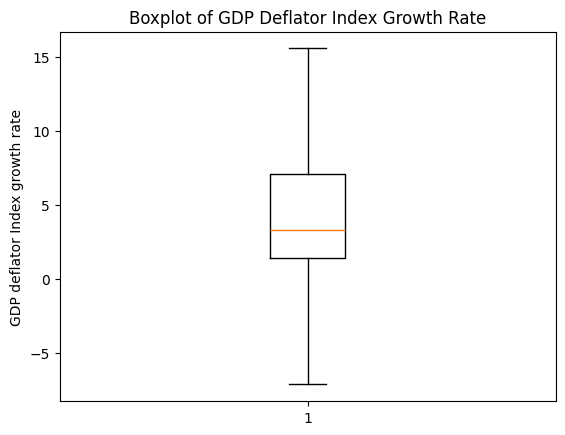

In [41]:
import matplotlib.pyplot as plt

plt.boxplot(df['GDP deflator Index growth rate'], vert=True)
plt.ylabel('GDP deflator Index growth rate')
plt.title('Boxplot of GDP Deflator Index Growth Rate')
plt.show()


In [30]:
print("Before:", df.shape)
print("After:", df_clean.shape)


Before: (1155, 17)
After: (1059, 17)


Before: (1155, 17)
After: 0


ValueError: Boolean array expected for the condition, not object

mean_value: 4.477127687165697
std_value: 4.9292201458905405


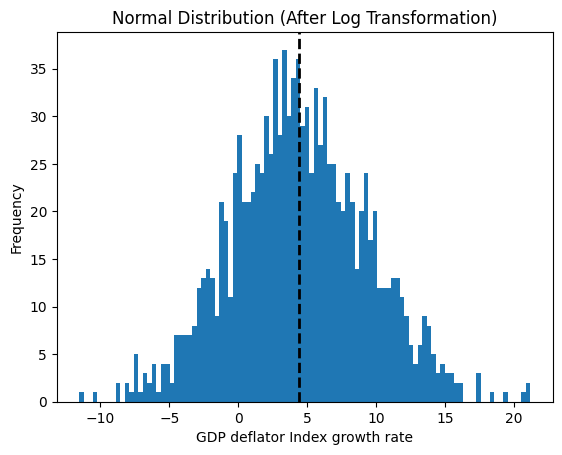

In [42]:
mean_value = df['GDP deflator Index growth rate'].mean()
print("mean_value:", mean_value)

std_value = df['GDP deflator Index growth rate'].std()

print("std_value:", std_value)

size = df['GDP deflator Index growth rate'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('GDP deflator Index growth rate')
plt.ylabel('Frequency')
plt.title('Normal Distribution (After Log Transformation)')
plt.show()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1155 non-null   object 
 1   Year                                    1155 non-null   int64  
 2   Headline Consumer Price Inflation       1155 non-null   float64
 3   Energy Consumer Price Inflation         1155 non-null   float64
 4   Food Consumer Price Inflation           1155 non-null   float64
 5   Official Core Consumer Price Inflation  716 non-null    float64
 6   Producer Price Inflation                751 non-null    float64
 7   GDP deflator Index growth rate          1155 non-null   float64
 8   Continent/Region                        1155 non-null   object 
 9   Score                                   1155 non-null   float64
 10  GDP per Capita                          1155 non-null   floa

In [43]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation    439
Producer Price Inflation                  404
GDP deflator Index growth rate              0
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   0
Perceptions_log                             0
dtype: int64

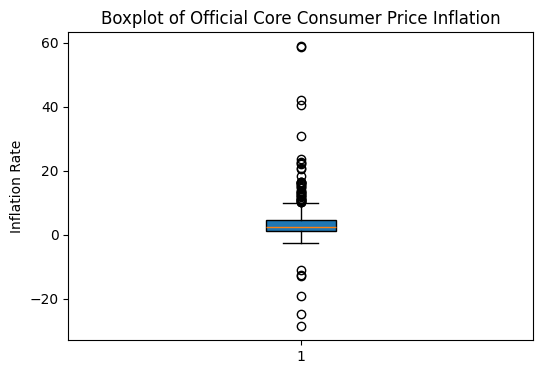

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(
    df['Official Core Consumer Price Inflation'].dropna(),
    vert=True,
    patch_artist=True
)

plt.title('Boxplot of Official Core Consumer Price Inflation')
plt.ylabel('Inflation Rate')
plt.show()


In [45]:
df['Official Core Consumer Price Inflation'] = df['Official Core Consumer Price Inflation'].fillna(
    df['Official Core Consumer Price Inflation'].mean()
)


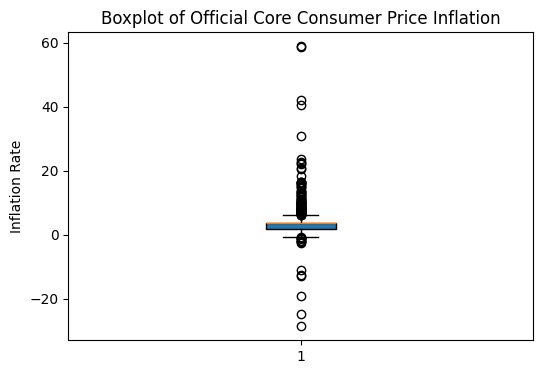

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(
    df['Official Core Consumer Price Inflation'].dropna(),
    vert=True,
    patch_artist=True
)

plt.title('Boxplot of Official Core Consumer Price Inflation')
plt.ylabel('Inflation Rate')
plt.show()


mean_value: 3.5148012839923797
std_value: 4.37056176665501


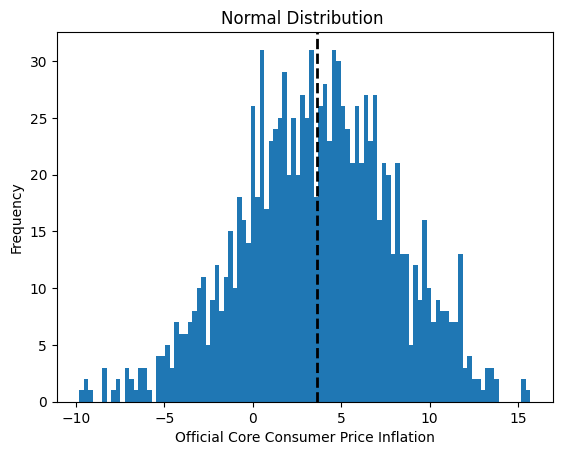

In [47]:
mean_value = df['Official Core Consumer Price Inflation'].mean()
print("mean_value:", mean_value)

std_value = df['Official Core Consumer Price Inflation'].std()

print("std_value:", std_value)

size = df['Official Core Consumer Price Inflation'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('Official Core Consumer Price Inflation')
plt.ylabel('Frequency')
plt.title('Normal Distribution ')
plt.show()


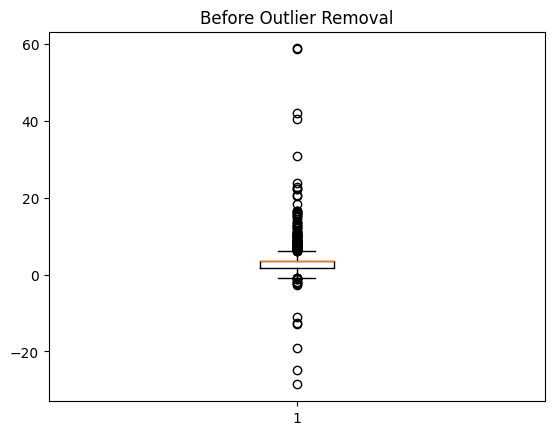

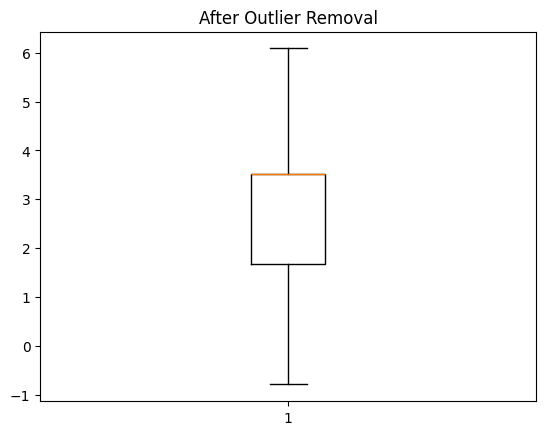

In [50]:
Q1 = df['Official Core Consumer Price Inflation'].quantile(0.25)
Q3 = df['Official Core Consumer Price Inflation'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[
    (df['Official Core Consumer Price Inflation'] >= lower_bound) &
    (df['Official Core Consumer Price Inflation'] <= upper_bound)
]

plt.boxplot(df['Official Core Consumer Price Inflation'].dropna())
plt.title('Before Outlier Removal')
plt.show()
plt.boxplot(df_no_outliers['Official Core Consumer Price Inflation'])
plt.title('After Outlier Removal')
plt.show()


mean_value: 3.5148012839923797
std_value: 4.37056176665501


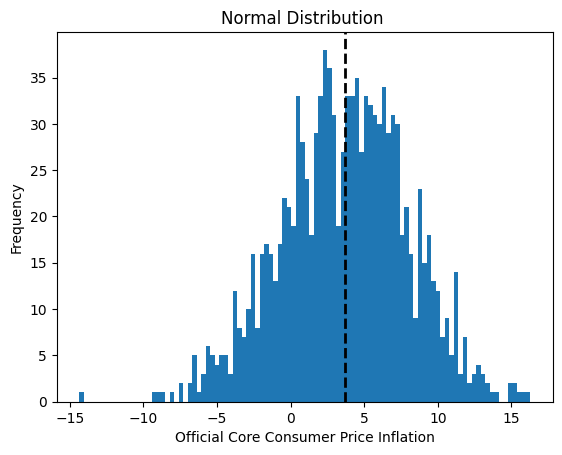

In [51]:
mean_value = df['Official Core Consumer Price Inflation'].mean()
print("mean_value:", mean_value)

std_value = df['Official Core Consumer Price Inflation'].std()

print("std_value:", std_value)

size = df['Official Core Consumer Price Inflation'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('Official Core Consumer Price Inflation')
plt.ylabel('Frequency')
plt.title('Normal Distribution ')
plt.show()


In [52]:
df.isnull().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation           0
Energy Consumer Price Inflation             0
Food Consumer Price Inflation               0
Official Core Consumer Price Inflation      0
Producer Price Inflation                  404
GDP deflator Index growth rate              0
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   0
Perceptions_log                             0
dtype: int64

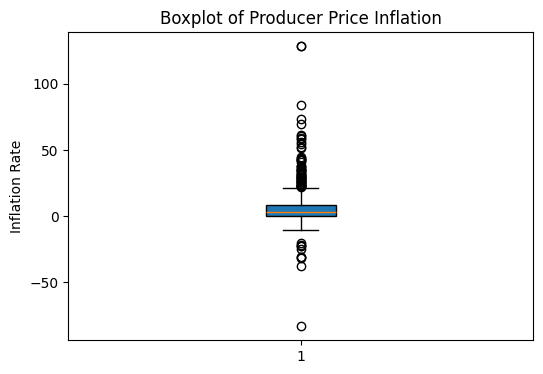

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(
    df['Producer Price Inflation'].dropna(),
    vert=True,
    patch_artist=True
)

plt.title('Boxplot of Producer Price Inflation')
plt.ylabel('Inflation Rate')
plt.show()


mean_value: 5.880934420706515
std_value: 13.780345975000614


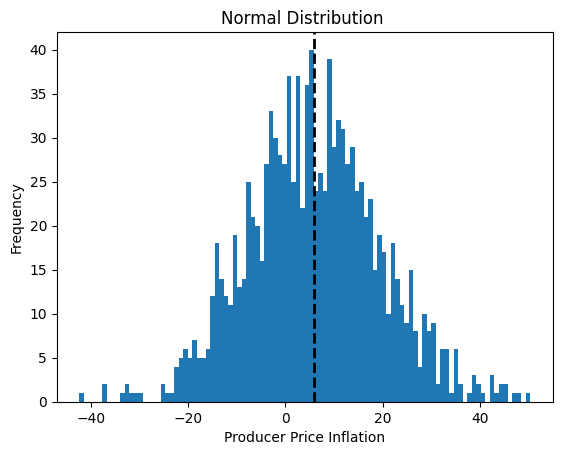

In [57]:
mean_value = df['Producer Price Inflation'].mean()
print("mean_value:", mean_value)

std_value = df['Producer Price Inflation'].std()

print("std_value:", std_value)

size = df['Producer Price Inflation'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('Producer Price Inflation')
plt.ylabel('Frequency')
plt.title('Normal Distribution ')
plt.show()


In [63]:
df['Producer Price Inflation'] = df.groupby('Continent/Region')[
    'Producer Price Inflation'
].transform(lambda x: x.fillna(x.mean()))


mean_value: 6.262703303754452
std_value: 11.428214522283467


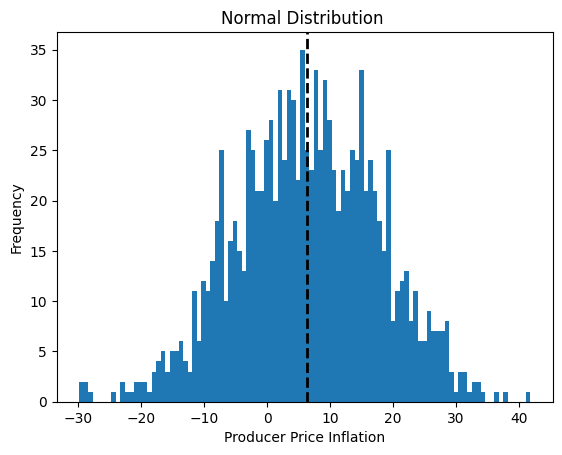

In [64]:
mean_value = df['Producer Price Inflation'].mean()
print("mean_value:", mean_value)

std_value = df['Producer Price Inflation'].std()

print("std_value:", std_value)

size = df['Producer Price Inflation'].size
size
values = np.random.normal(mean_value, std_value, size)

plt.hist(values, bins=100)
plt.axvline(values.mean(), linestyle='dashed',color='k', linewidth=2)
plt.xlabel('Producer Price Inflation')
plt.ylabel('Frequency')
plt.title('Normal Distribution ')
plt.show()


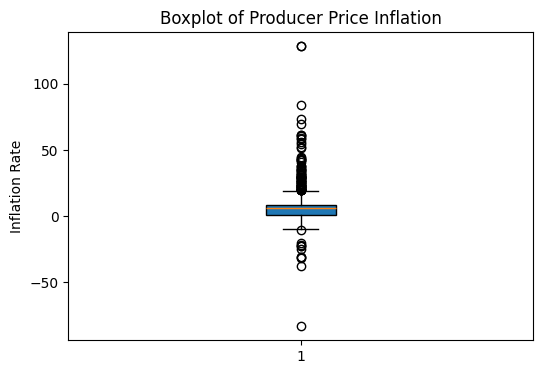

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(
    df['Producer Price Inflation'].dropna(),
    vert=True,
    patch_artist=True
)

plt.title('Boxplot of Producer Price Inflation')
plt.ylabel('Inflation Rate')
plt.show()


In [71]:
df['Producer Price Inflation'].isnull().sum()

np.int64(0)

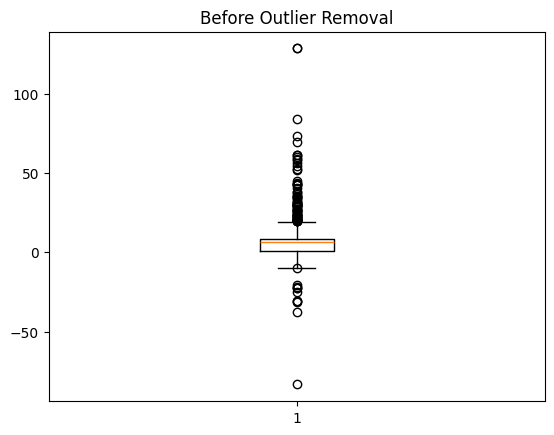

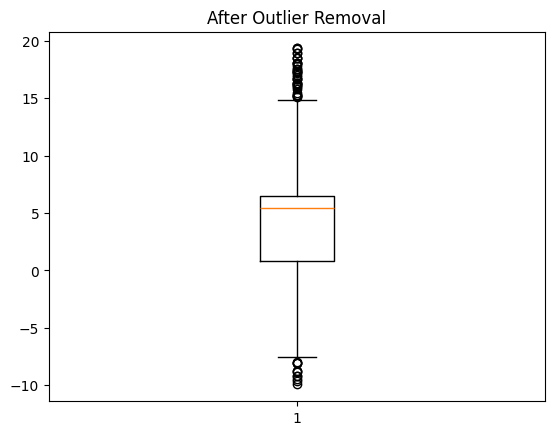

In [90]:
df.to_csv("WHicleaned_data.csv", index=False)


In [76]:
df.isnull().sum()

Country                                   0
Year                                      0
Headline Consumer Price Inflation         0
Energy Consumer Price Inflation           0
Food Consumer Price Inflation             0
Official Core Consumer Price Inflation    0
Producer Price Inflation                  0
GDP deflator Index growth rate            0
Continent/Region                          0
Score                                     0
GDP per Capita                            0
Social support                            0
Healthy life expectancy at birth          0
Freedom to make life choices              0
Generosity                                0
Perceptions of corruption                 0
Perceptions_log                           0
dtype: int64

In [77]:
df.columns

Index(['Country', 'Year', 'Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation', 'Producer Price Inflation',
       'GDP deflator Index growth rate', 'Continent/Region', 'Score',
       'GDP per Capita', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Perceptions_log'],
      dtype='object')

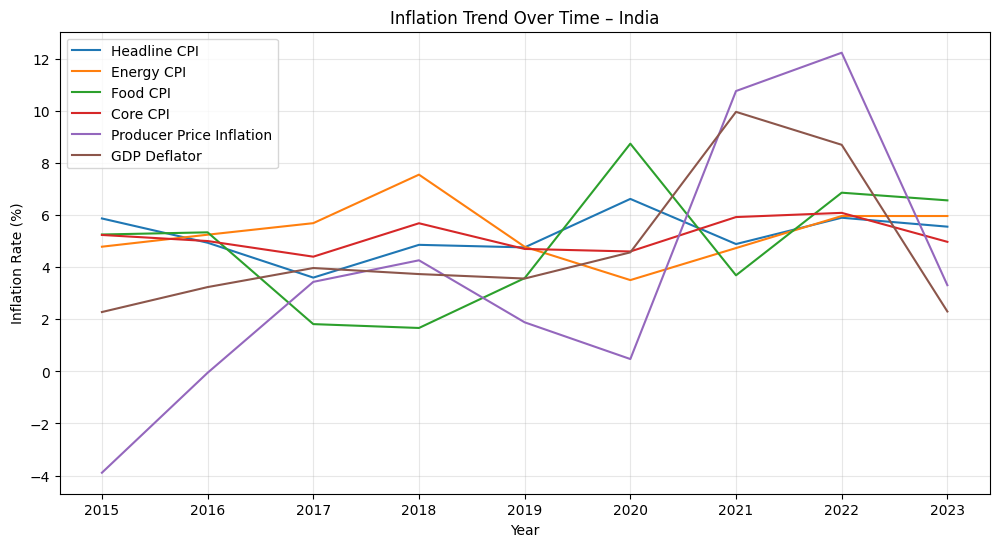

In [78]:
import matplotlib.pyplot as plt

# select one country
country_name = 'India'   # change as needed

df_country = df[df['Country'] == country_name]

plt.figure(figsize=(12,6))

plt.plot(df_country['Year'], df_country['Headline Consumer Price Inflation'], label='Headline CPI')
plt.plot(df_country['Year'], df_country['Energy Consumer Price Inflation'], label='Energy CPI')
plt.plot(df_country['Year'], df_country['Food Consumer Price Inflation'], label='Food CPI')
plt.plot(df_country['Year'], df_country['Official Core Consumer Price Inflation'], label='Core CPI')
plt.plot(df_country['Year'], df_country['Producer Price Inflation'], label='Producer Price Inflation')
plt.plot(df_country['Year'], df_country['GDP deflator Index growth rate'], label='GDP Deflator')

plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title(f'Inflation Trend Over Time – {country_name}')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


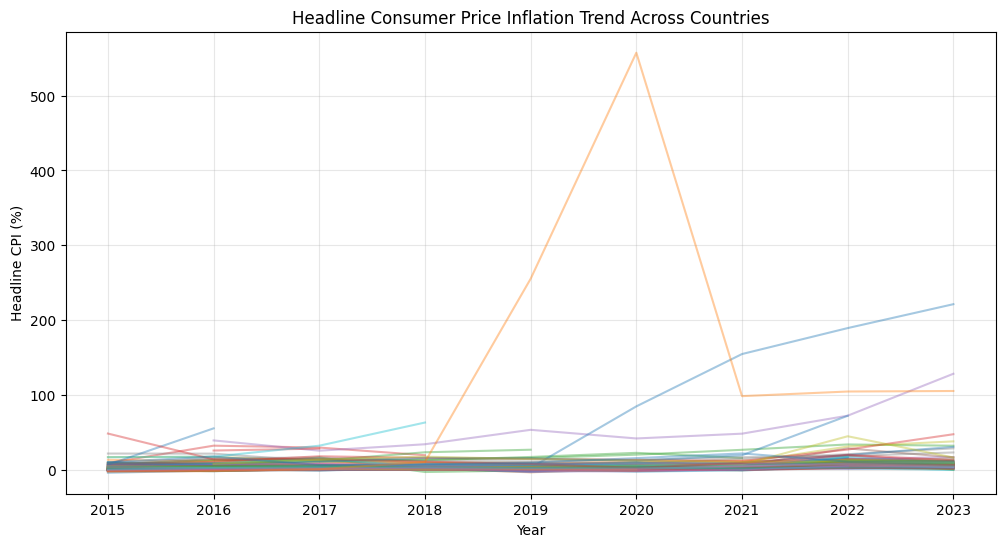

In [79]:
plt.figure(figsize=(12,6))

for country in df['Country'].unique():
    df_temp = df[df['Country'] == country]
    plt.plot(df_temp['Year'], df_temp['Headline Consumer Price Inflation'], alpha=0.4)

plt.xlabel('Year')
plt.ylabel('Headline CPI (%)')
plt.title('Headline Consumer Price Inflation Trend Across Countries')
plt.grid(alpha=0.3)

plt.show()


In [80]:
df[['Headline Consumer Price Inflation','Energy Consumer Price Inflation','Food Consumer Price Inflation']].corr()


,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation
Headline Consumer Price Inflation,1.000000,0.805886,0.656785
Energy Consumer Price Inflation,0.805886,1.000000,0.607061
Food Consumer Price Inflation,0.656785,0.607061,1.000000


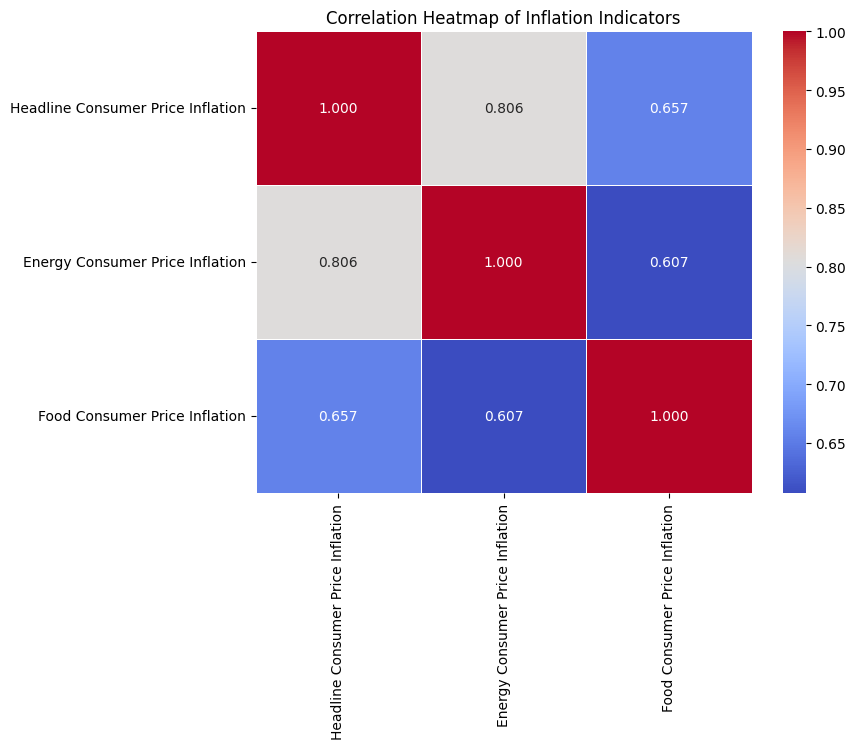

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select required columns
inflation_cols = [
    'Headline Consumer Price Inflation',
    'Energy Consumer Price Inflation',
    'Food Consumer Price Inflation'
]

# Compute correlation matrix
corr_matrix = df[inflation_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Inflation Indicators')
plt.show()


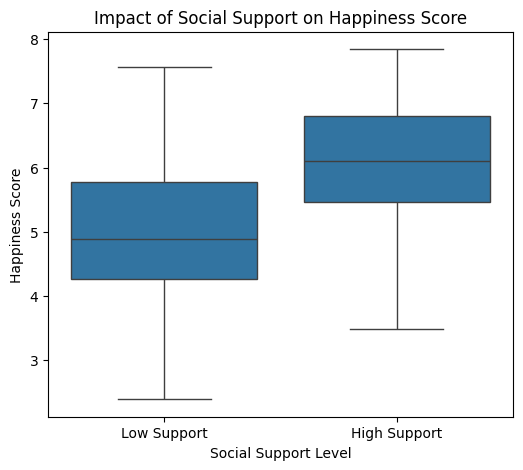

In [82]:
# Create High / Low social support groups
median_support = df['Social support'].median()

df['Support_Level'] = df['Social support'].apply(
    lambda x: 'High Support' if x >= median_support else 'Low Support'
)

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x='Support_Level',
    y='Score'
)
plt.title('Impact of Social Support on Happiness Score')
plt.xlabel('Social Support Level')
plt.ylabel('Happiness Score')
plt.show()


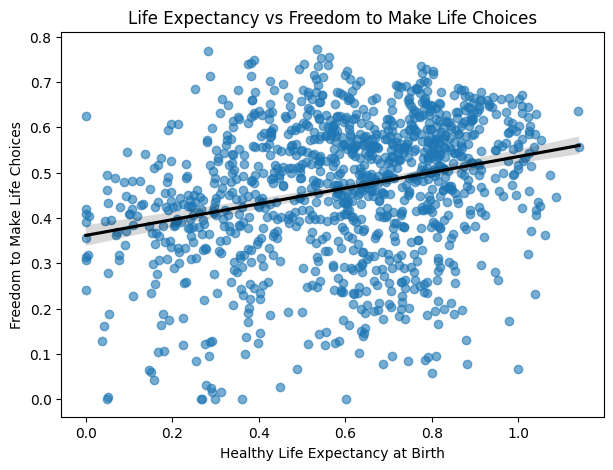

In [83]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x='Healthy life expectancy at birth',
    y='Freedom to make life choices',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'black'}
)
plt.title('Life Expectancy vs Freedom to Make Life Choices')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Freedom to Make Life Choices')
plt.show()


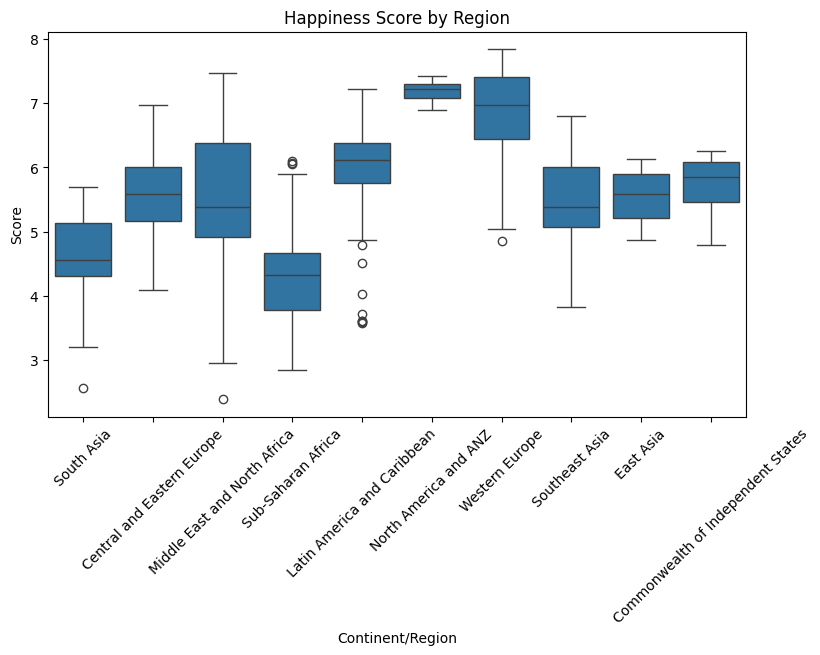

In [84]:
plt.figure(figsize=(9,5))
sns.boxplot(
    data=df,
    x='Continent/Region',
    y='Score'
)
plt.xticks(rotation=45)
plt.title('Happiness Score by Region')
plt.show()


In [87]:
#Does Energy / Food inflation CAUSE Headline inflation?
from statsmodels.tsa.stattools import grangercausalitytests

# Time-series for one country (important!)

country_df = df[df['Country'] == 'India'] \
               .sort_values('Year')

ts_data = country_df[
    ['Headline Consumer Price Inflation',
     'Energy Consumer Price Inflation']
].dropna()

grangercausalitytests(ts_data, maxlag=2, verbose=True)
print("If p-value < 0.05 → Granger causality exists")
print("If p-value ≥ 0.05 → No Granger causality")
print('The tested inflation component does not Granger-cause Headline Inflation')



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2017  , p=0.6721  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.3227  , p=0.5700  , df=1
likelihood ratio test: chi2=0.3164  , p=0.5738  , df=1
parameter F test:         F=0.2017  , p=0.6721  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3158  , p=0.7600  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=2.2103  , p=0.3312  , df=2
likelihood ratio test: chi2=1.9209  , p=0.3827  , df=2
parameter F test:         F=0.3158  , p=0.7600  , df_denom=2, df_num=2
If p-value < 0.05 → Granger causality exists
If p-value ≥ 0.05 → No Granger causality
The tested inflation component does not Granger-cause Headline Inflation


C:\Users\mary p seby\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [2]:
import pandas as pd
df=pd.read_csv('WHicleaned_data.csv')
df.columns

Index(['Country', 'Year', 'Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation', 'Producer Price Inflation',
       'GDP deflator Index growth rate', 'Continent/Region', 'Score',
       'GDP per Capita', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Perceptions_log', 'Support_Level'],
      dtype='object')

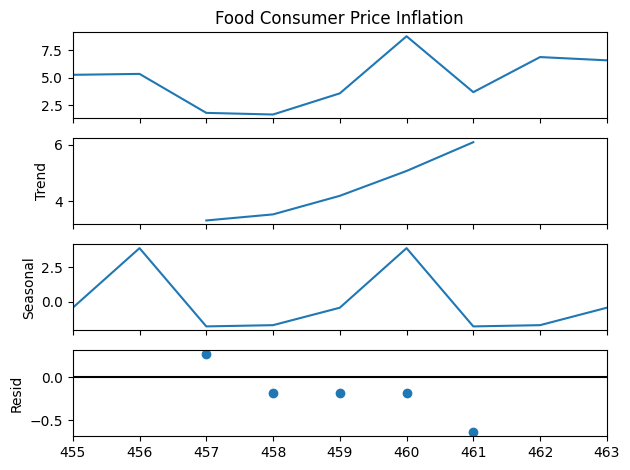

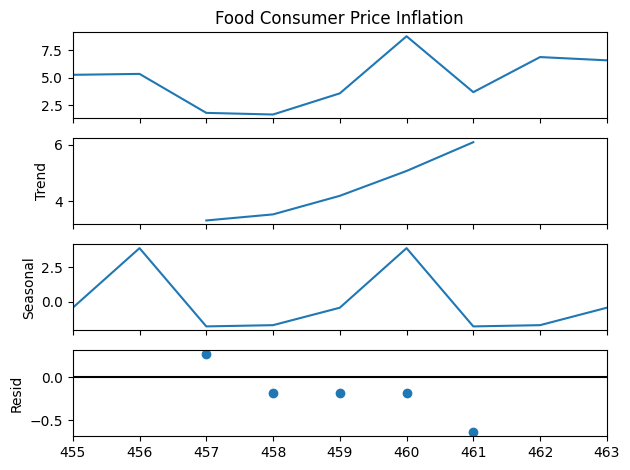

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

country_df = df[df['Country'] == 'India'] \
               .sort_values('Year')

series = country_df['Food Consumer Price Inflation']

decomp = seasonal_decompose(
    series,
    model='additive',
    period=4   # quarterly proxy (annual data)
)

decomp.plot()


In [7]:
#h0:inflation does not differ across years/periods 
#h1:inflation differ significantly across years/periods

from scipy.stats import f_oneway

groups = [
    g['Food Consumer Price Inflation']
    for _, g in df.groupby('Year')
]

f_stat, p_val = f_oneway(*groups)
print(f_stat)
print(p_val)


19.739818538098255
4.377661540553096e-28


In [11]:
#Reject H₀
#There is strong statistical evidence that Food Consumer Price Inflation differs significantly across years.

In [8]:
#will Inflation Impact on Happiness
import statsmodels.api as sm

X = df[['Headline Consumer Price Inflation',
        'GDP per Capita',
        'Social support']]

X = sm.add_constant(X)
y = df['Score']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     703.4
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          1.12e-259
Time:                        07:57:54   Log-Likelihood:                -1172.1
No. Observations:                1155   AIC:                             2352.
Df Residuals:                    1151   BIC:                             2372.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
# 1-unit increase in inflation reduces the happiness score by 0.0067 units, holding other factors constant.
#headline inflation has a statistically significant negative effect on happiness.
#while GDP per capita and social support exert strong positive influences.
#The model explains approximately 65% of the variation in happiness scores, highlighting the importance of both economic stability and social infrastructure

In [9]:
#H₀(null):  inflation is non-stationary (persistent)
#H₁(alternative): The series is stationary
from statsmodels.tsa.stattools import adfuller

adf = adfuller(series.dropna())
print("p-value:", adf[1])


p-value: 0.22659990974146893


In [ ]:
#The inflation series is non-stationary
#Inflation shows persistence over time


In [15]:
from scipy.stats import spearmanr

rho, p = spearmanr(
    df['Headline Consumer Price Inflation'],
    df['Score']
)
print("rho:",rho)
print("p-vale:",p)

rho: -0.2668811886090509
p-vale: 2.754867833256568e-20


In [ ]:
#There is a statistically significant negative monotonic relationship between Headline Consumer Price Inflation and Score.

In [18]:
'''H₀ (Null hypothesis):
Mean Headline Consumer Price Inflation is the same across all continents/regions.

H₁ (Alternative hypothesis):
 Mean Headline Consumer Price Inflation differs for at least one continent/region.'''

groups = [
    g['Headline Consumer Price Inflation']
    for _, g in df.groupby('Continent/Region')
]

f_stat, p_val = f_oneway(*groups)
print("f_stat :",f_stat )
print( "p_val:",p_val )


f_stat : 2.947969933534018
p_val: 0.0018181431110150482


In [ ]:
#There is a statistically significant difference in mean Headline Consumer Price Inflation across continents/regions.

In [20]:
#Corruption vs Score
rho_c, p_c = spearmanr(
    df['Perceptions of corruption'],
    df['Score'],
    nan_policy='omit'
)
print("rho_c:",rho_c, p_c)
print("p_c:", p_c)



rho_c: 0.363969511661241 1.6879319061491161e-37
p_c: 1.6879319061491161e-37


In [ ]:
#Spearman’s rho = 0.364
#Indicates a moderate positive monotonic relationship

In [22]:
#Inflation vs corruption
rho_inf, p_inf = spearmanr(
    df['Headline Consumer Price Inflation'],
    df['Perceptions of corruption'],
    nan_policy='omit'
)

print("rho_inf:",rho_inf)
print("p_inf:", p_inf)

rho_inf: -0.04596650803023631
p_inf: 0.1184485184420954


In [ ]:
#Very weak negative association


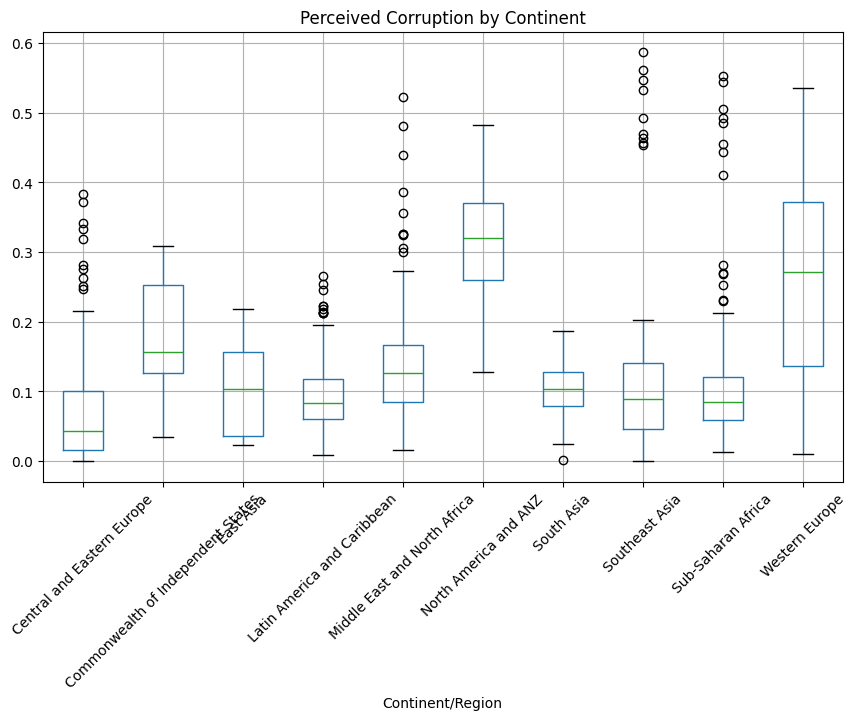

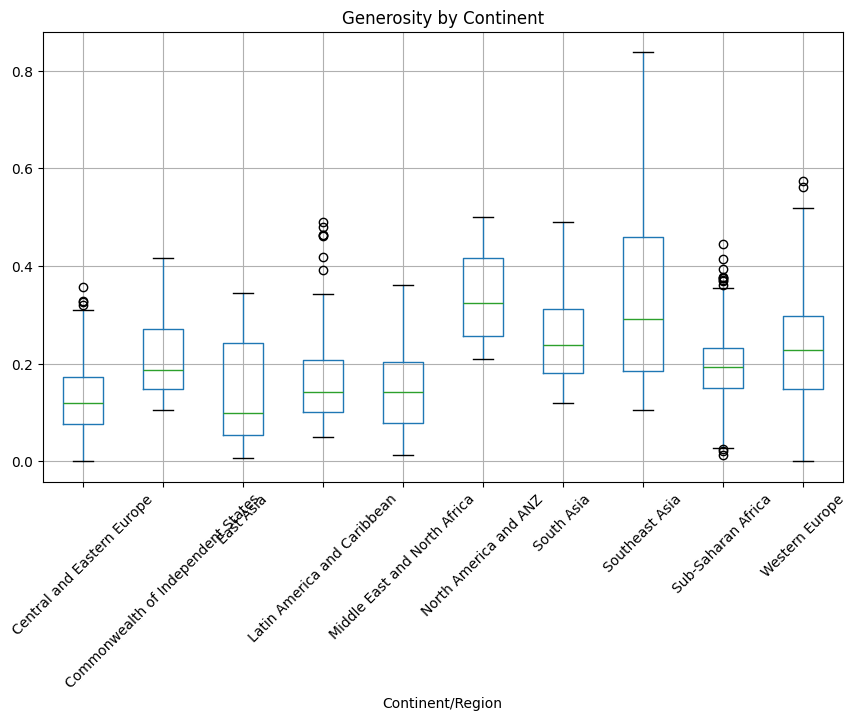

In [24]:
import matplotlib.pyplot as plt
df.boxplot(
    column='Perceptions of corruption',
    by='Continent/Region',
    figsize=(10,6),
    rot=45
)
plt.title('Perceived Corruption by Continent')
plt.suptitle('')
plt.show()

df.boxplot(
    column='Generosity',
    by='Continent/Region',
    figsize=(10,6),
    rot=45
)
plt.title('Generosity by Continent')
plt.suptitle('')
plt.show()
